# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [16]:
#import packages
import pandas as pd
import numpy as np

# clean the Price variable
airbnb_df = pd.read_csv("./data/airbnb_hw.csv")
airbnb_df['Price'] = airbnb_df['Price'].replace('[\$,]', '', regex=True).astype(float)
missing_prices = airbnb_df['Price'].isna().sum()

# clean subject_injury
police_df = pd.read_csv("./data/mn_police_use_of_force.csv")
police_df['subject_injury'] = police_df['subject_injury'].fillna('No')
police_df['subject_injury'] = police_df['subject_injury'].apply(lambda x: 'Yes' if x.lower() == 'yes' else 'No')
missing_subject_injury = police_df['subject_injury'].isna().sum()

# Cross-tabulation with force_type help from chatgpt
crosstab_result = pd.crosstab(police_df['subject_injury'], police_df['force_type'])
print("Cross-tabulation of subject_injury with force_type:\n", crosstab_result)

# Load pretrial dataset and clean WhetherDefendantWasReleasedPretrial
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
pretrial_df = pd.read_csv(url,low_memory=False) 
pretrial_df['WhetherDefendantWasReleasedPretrial'] = pretrial_df['WhetherDefendantWasReleasedPretrial'].replace("", np.nan)
pretrial_df['ImposedSentenceAllChargeInContactEvent'] = pretrial_df['ImposedSentenceAllChargeInContactEvent'].fillna(pretrial_df['SentenceTypeAllChargesAtConvictionInContactEvent'])


Cross-tabulation of subject_injury with force_type:
 force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  2          8144               1552        2   
Yes                 2          1286                 41        0   

force_type      Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury                                                      
No                             60                108           87   
Yes                            44                 40            0   

force_type      Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury                                                        
No                                   1                          170   
Yes                                  2                            0   

force_type      Police K9 Bite  Taser  
subject_injury                         
No                          33   113

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

/var/folders/p5/l6nz6t5d45qg_wh67tn89hwh0000gn/T/ipykernel_87955/1506319700.py:8: DtypeWarning: Columns (0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  shark_df = pd.read_csv("shark.csv")


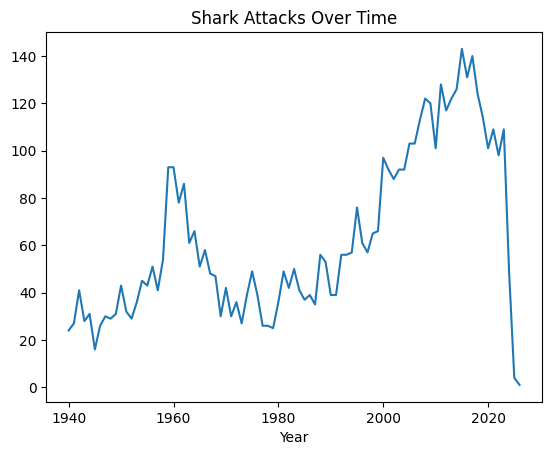

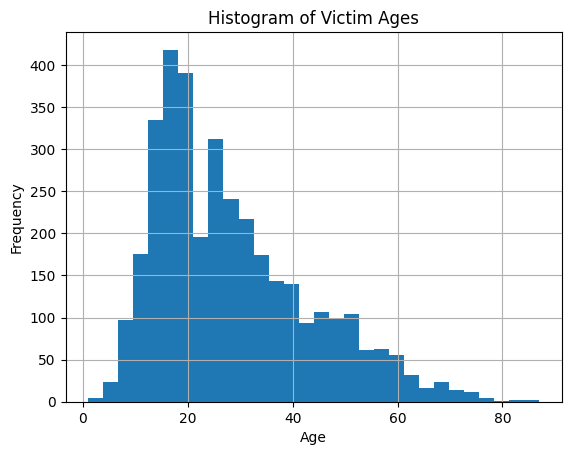

Proportion of male victims: 78.74%
Proportion of unprovoked attacks: 74.29%
Unprovoked attacks: Male = 3311, Female = 600
Fatal attacks: Provoked = 13, Unprovoked = 679
Proportion of attacks by white sharks: 12.04%


In [ ]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Q1 & Q2
# Load data and drop all columns w no data
shark_df = pd.read_csv("shark.csv") 
shark_df.dropna(axis=1, how='all', inplace=True)

#Q3
# Clean  Year 
shark_df['Year'] = pd.to_numeric(shark_df['Year'], errors='coerce')
shark_df = shark_df[shark_df['Year'] >= 1940]

# Trend analysis
shark_attacks_per_year = shark_df.groupby('Year').size()
shark_attacks_per_year.plot(title='Shark Attacks Over Time')
plt.show()

# Q4
# Clean Age 
shark_df['Age'] = pd.to_numeric(shark_df['Age'], errors='coerce')
shark_df['Age'].dropna().astype(int).hist(bins=30)
plt.title('Histogram of Victim Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#Q5
# Proportion of male victims
shark_df['Sex'] = shark_df['Sex'].str.upper().str.strip()
male_proportion = (shark_df['Sex'] == 'M').mean()
print(f"Proportion of male victims: {male_proportion:.2%}")

#Q6
# Clean Type 
shark_df['Type'] = shark_df['Type'].str.title().str.strip()
shark_df['Type'] = shark_df['Type'].apply(lambda x: x if x in ['Provoked', 'Unprovoked'] else 'Unknown')
unprovoked_proportion = (shark_df['Type'] == 'Unprovoked').mean()
print(f"Proportion of unprovoked attacks: {unprovoked_proportion:.2%}")

#Q7
# Clean Fatal Y/N 
shark_df['Fatal Y/N'] = shark_df['Fatal Y/N'].str.upper().str.strip()
shark_df['Fatal Y/N'] = shark_df['Fatal Y/N'].apply(lambda x: 'Y' if x == 'Y' else ('N' if x == 'N' else 'Unknown'))

#Q8
# Analysis of attack likelihood by gender and fatality
unprovoked_male = shark_df[(shark_df['Type'] == 'Unprovoked') & (shark_df['Sex'] == 'M')].shape[0]
unprovoked_female = shark_df[(shark_df['Type'] == 'Unprovoked') & (shark_df['Sex'] == 'F')].shape[0]
print(f"Unprovoked attacks: Male = {unprovoked_male}, Female = {unprovoked_female}")

provoked_fatal = shark_df[(shark_df['Type'] == 'Provoked') & (shark_df['Fatal Y/N'] == 'Y')].shape[0]
unprovoked_fatal = shark_df[(shark_df['Type'] == 'Unprovoked') & (shark_df['Fatal Y/N'] == 'Y')].shape[0]
print(f"Fatal attacks: Provoked = {provoked_fatal}, Unprovoked = {unprovoked_fatal}")

#Q9
# Proportion of attacks by white sharks
shark_df['Species'] = shark_df['Species'].str.lower().str.strip()
white_shark_proportion = shark_df['Species'].str.contains('white shark', na=False).mean()
print(f"Proportion of attacks by white sharks: {white_shark_proportion:.2%}")


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

In [ ]:
1. The abstract of the "Tidy Data" paper talks about data tidying which is talked about as an essential part of data cleaning. Data tidying talks about structuring data in a format where each variable is a column and each observation is a row, and each observational unit is a table which makes data easier to manipulate, model, and visualize. The paper says consistent structure makes the process of cleaning messy datasets easier.

2. The "tidy data standard" is intended to make data analysis easier by providing a consistent way to organize data. This structure helps in reducing the complexity of data manipulation and makes it easier to apply statistical models and visualizations.

3. The first sentence is trying to depict that while tidy datasets follow a consistent structure, messy datasets can have a variety of issues and inconsistencies. The second sentence is trying to say that while it may be easy to identify observations and variables in a specific dataset, creating a overarching definition that applies to all datasets is difficult.

4. In Section 2.2, Wickham defines values as the individual pieces of data, variables as attributes being measured, and observations as the set of related values that together describe a single event. 

5. "Tidy Data" is defined as data where each variable forms a column, each observation forms a row, and each type of observational unit forms a table.

6. The five most common problems with messy datasets are:
    - Column headers are values, not variable names.
    - Multiple variables are stored in one column.
    - Variables are stored in both rows and columns.
    - Multiple types of observational units are stored in the same table.
    - A single observational unit is stored in multiple tables.
    The data in Table 4 are messy because they have multiple variables stored in one column. "Melting" a dataset refers to transforming it from a wide format to a long format, where each variable is a column.

7. Table 11 is messy because it combines multiple variables into one column, while Table 12 is tidy and "molten" because each variable forms a column, and each observation forms a row.

8. The "chicken-and-egg" problem with focusing on tidy data is that while tidy data makes analysis easier, creating tidy data requires understanding the analysis that will be performed. Wickham hopes that future work on data wrangling will lead to better tools and practices for creating and working with tidy data.

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?